<a href="https://colab.research.google.com/github/Niger49/CSE3210_DSP/blob/main/Fourier_Transformstion_DSP_LAB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Constructing a waves with different sine waves**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

**Difference between sine wave and cosine wave**

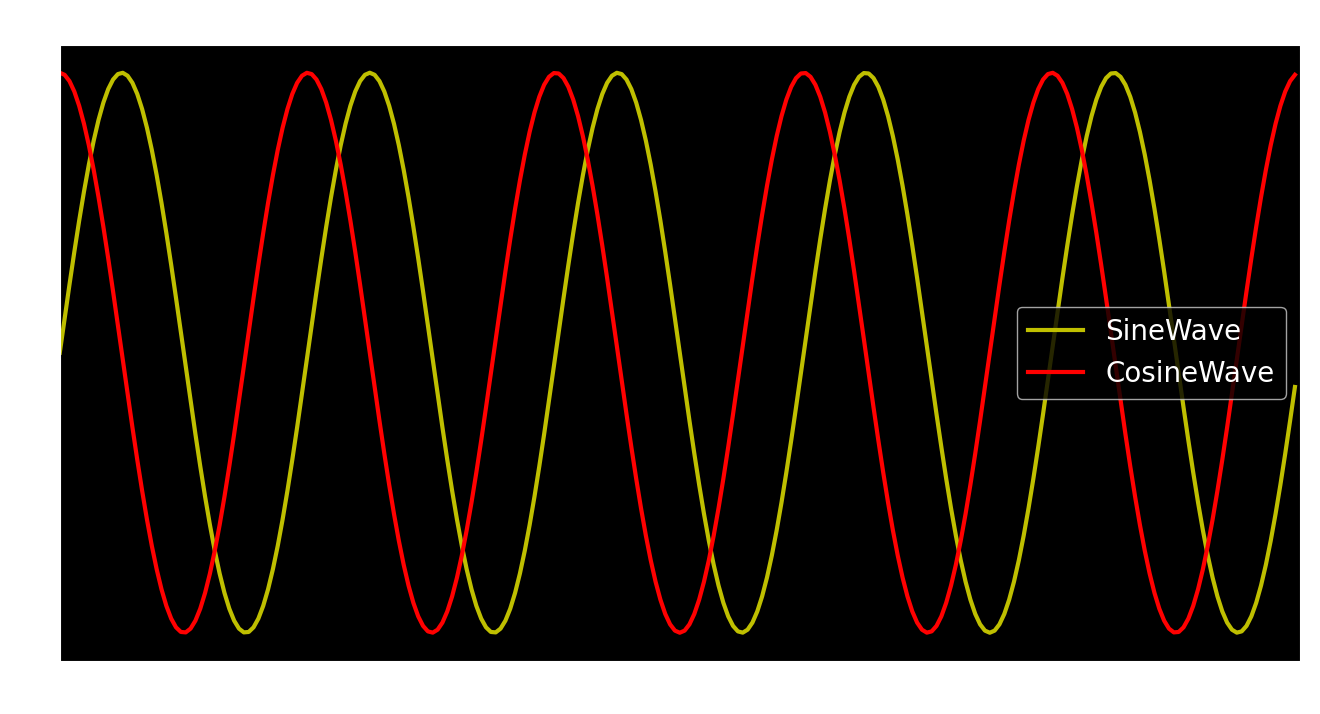

In [2]:
srate = 256  # Hz
t = np.arange(0.,1.,1/srate) # time vector in seconds
SineWave = 3 * np.sin( 2*np.pi * 5 * t)
CosineWave  = 3 * np.cos( 2*np.pi * 5 * t)
plt.figure(figsize = (16, 8))
style.use('dark_background')

plt.plot(t,SineWave,'y',linewidth =3,label='SineWave')
plt.plot(t,CosineWave,'r', linewidth = 3,label='CosineWave')
plt.xlabel('Time'), plt.ylabel('Amplitude')
plt.title('Sine and Cosine waves comparison', fontsize = 25)
plt.legend(fontsize = 20)
plt.xlim([0,1])
plt.show()

**Constructing a waves with sine, cosine and a DC**



In [4]:
srate = 256  # Hz
t = np.arange(0.,1.,1/srate) # time vector in seconds

x1 = np.sin(2 * np.pi * 2 * t) #   sinewave

x2 = 2 * np.cos(2 * np.pi * 4 * t) # Cosinewave

x3 = x1 + x2  # sum of sine and cosine

DC = 2

x4 = DC + x1 + x2 # sum of sine, cosine and DC.

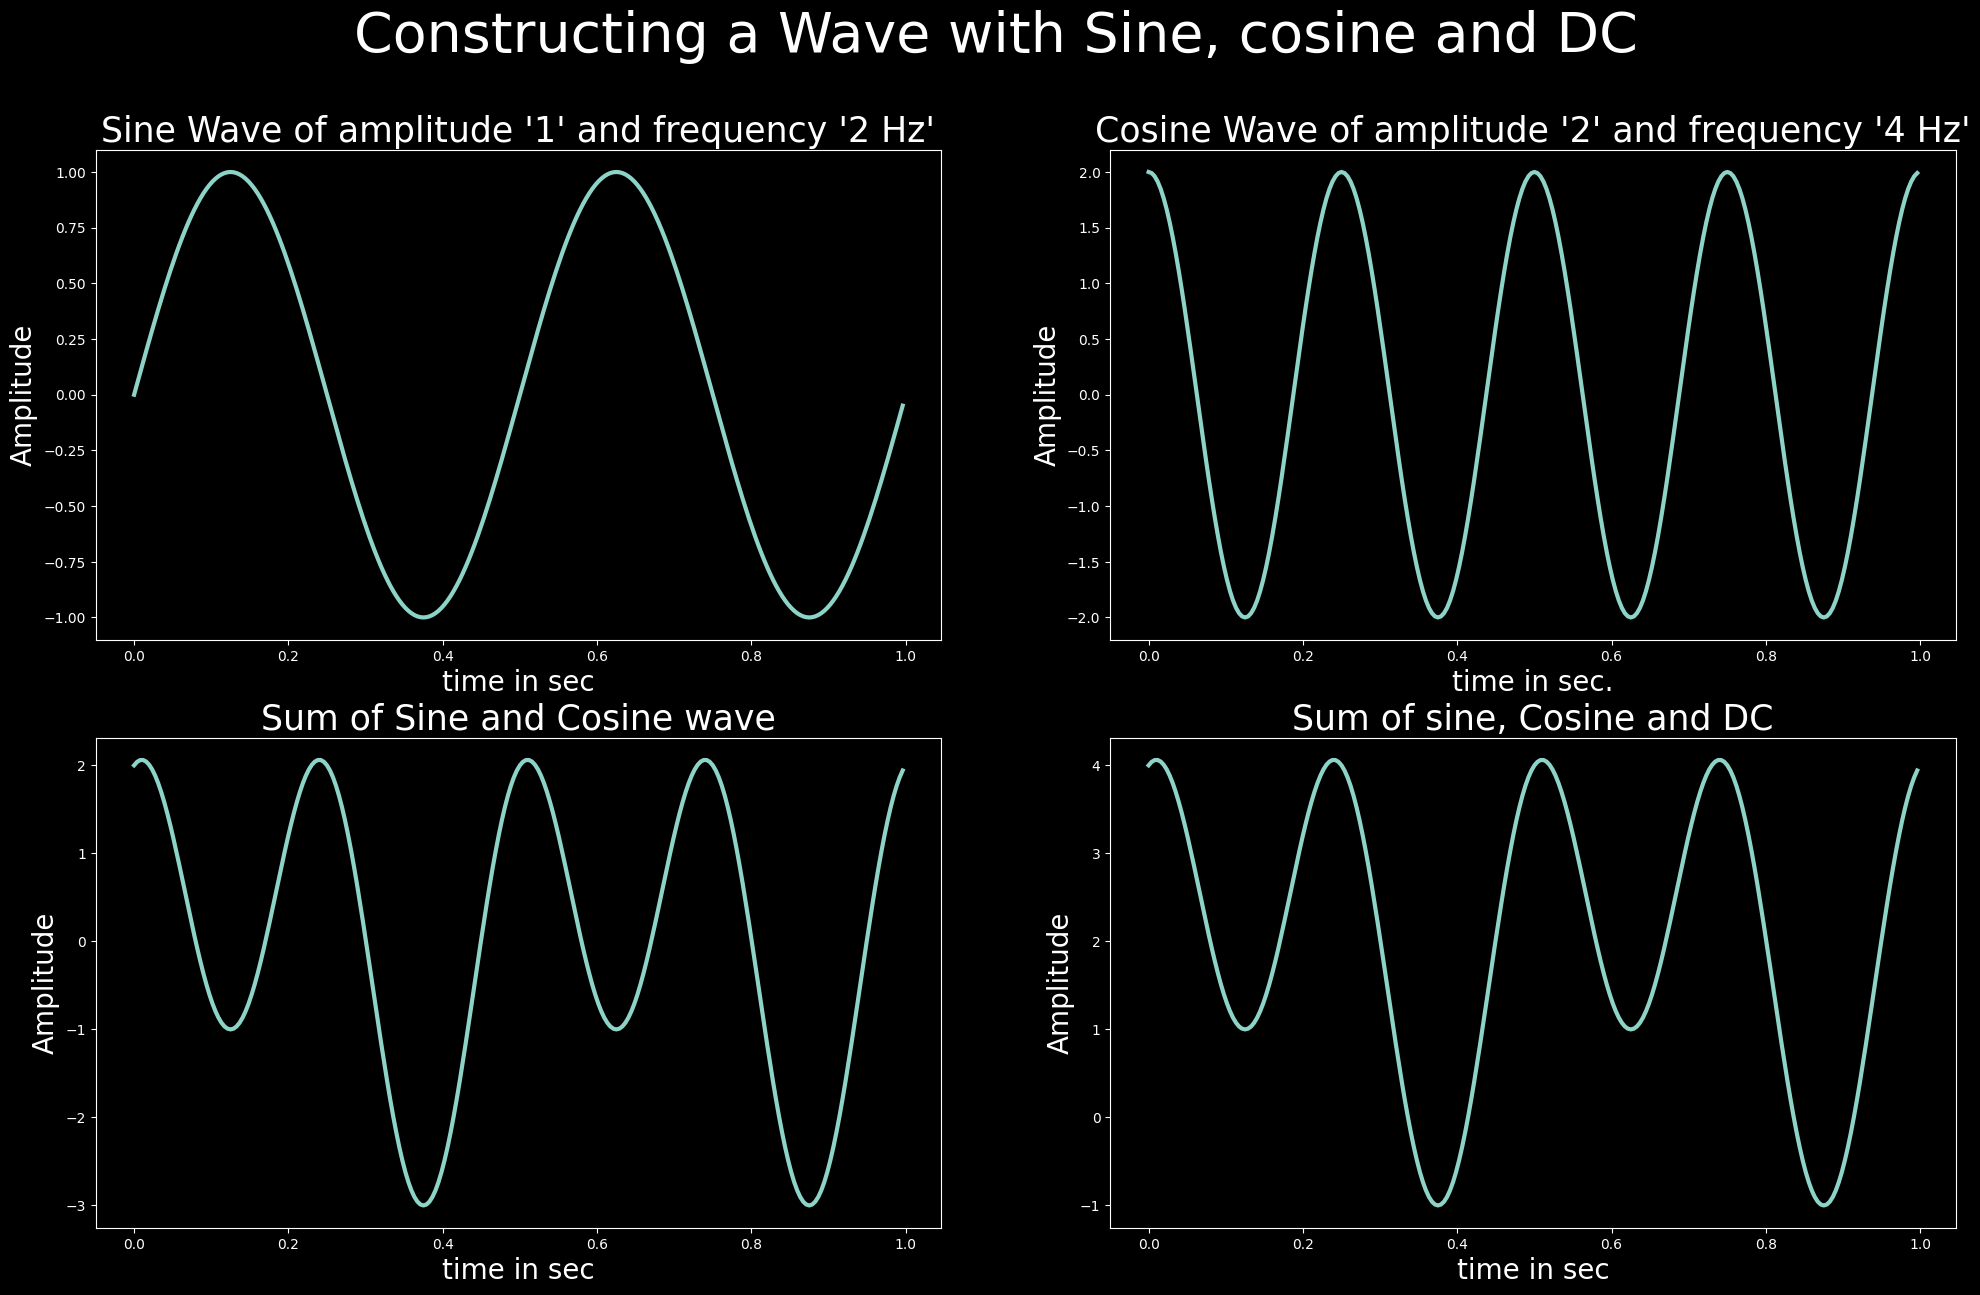

In [5]:
# Plotting

plt.figure(figsize = (24,14)) # set the size of figure
plt.suptitle('Constructing a Wave with Sine, cosine and DC', fontsize = 40)
style.use('dark_background')

plt.subplot(2,2,1)
plt.plot(t,x1,linewidth = 3)
plt.title("Sine Wave of amplitude '1' and frequency '2 Hz'", fontsize = 25)
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)

plt.subplot(2,2,2)
plt.plot(t,x2,linewidth = 3)
plt.title("Cosine Wave of amplitude '2' and frequency '4 Hz'", fontsize = 25)
plt.xlabel('time in sec.', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)

plt.subplot(2,2,3)
plt.plot(t,x3,linewidth = 3)
plt.title("Sum of Sine and Cosine wave", fontsize = 25)
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)

plt.subplot(2,2,4)
plt.plot(t,x4,linewidth = 3)
plt.title("Sum of sine, Cosine and DC", fontsize = 25)
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)

plt.show()

STEP BY STEP CODING FOR FOURIER TRANSFORMATION

FT OF A SIGNAL WITH MULTIPLE FREQUENCIES

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math

srate = 256  # Hz
Nyquist = srate / 2
t = np.arange(0.,1.,1/srate) # time vector in seconds

x1 = 5 * np.sin(2 * np.pi * 2 * t) # First sinewave

x2 = 2 * np.sin(2 * np.pi * 4 * t) # Second sinewave

x3 = 7 * np.sin(2 * np.pi * 6 * t) # Third sinewave

x = x1 + x2 + x3                  # Combined sinewave


# Initializing Fourier Coefficients
X   = np.zeros(len(x),dtype=complex) #c of k

for freq in range(0, len(t)):
    # create complex sine wave and compute dot product with signal
    csw = np.exp( -1j*2*np.pi*freq*t )
    X[freq] = np.sum( np.multiply(x,csw) )


# extract amplitudes
amps = 2 * np.abs(X)/ len(t)

# In the above line of code we multiplt by 2 to incorporate the negative frequecies of complex sinusoidal

# converitng indices to frequency
Nyquist = srate/2

#only need half the spectrum because the rest is just the mirror image (negative frequencies).
Hz = np.linspace(0, Nyquist, math.floor(len(t)/2)+1)

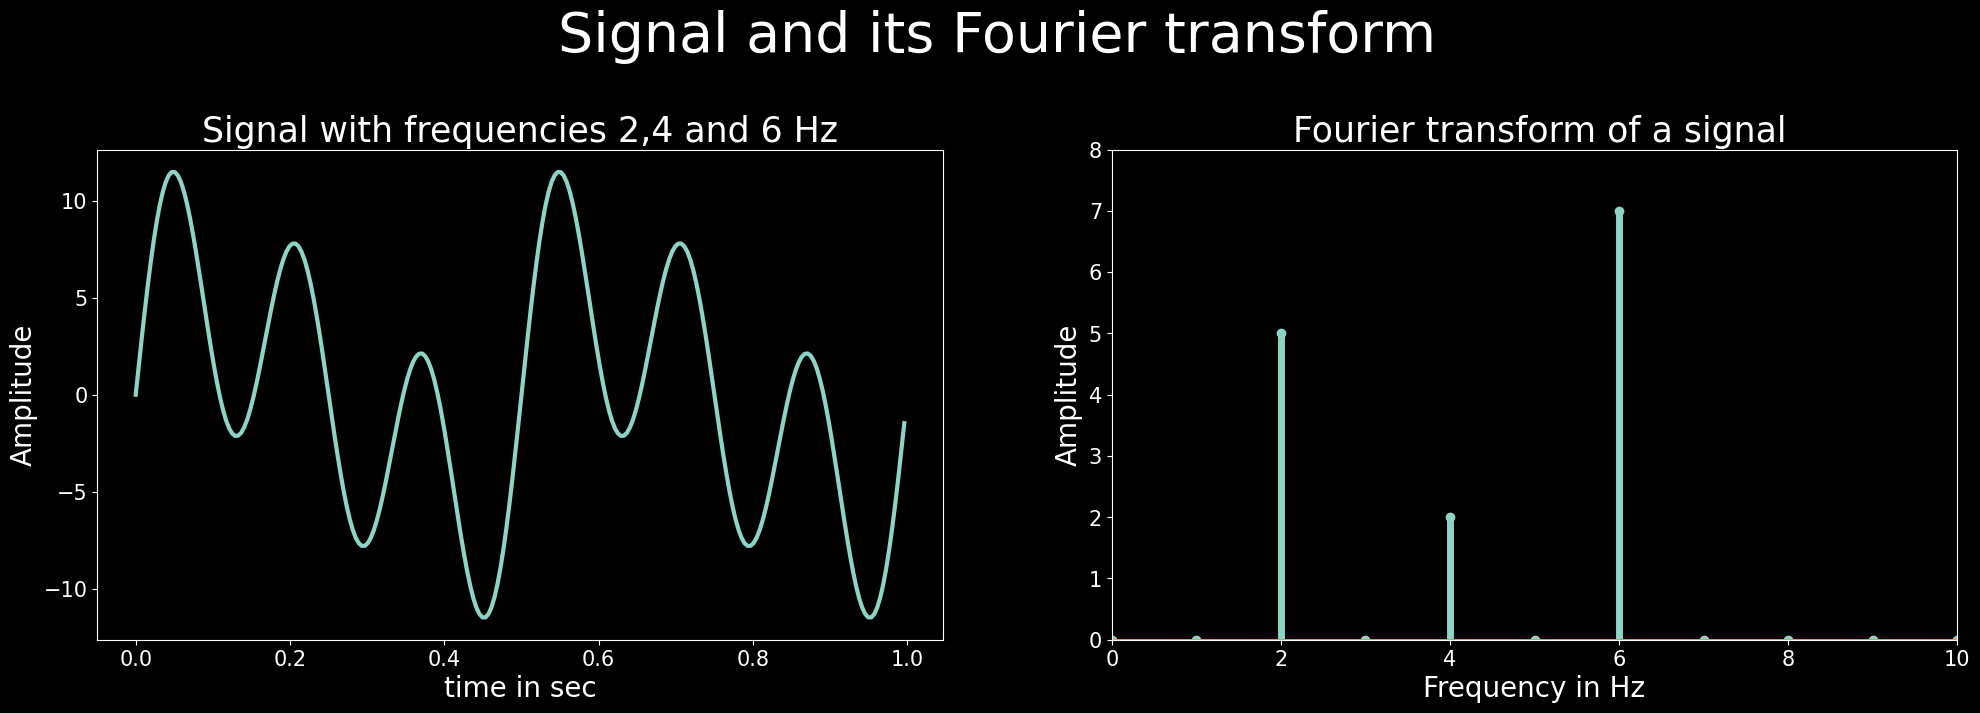

In [7]:
# Plotting
plt.figure(figsize = (24,14)) # set the size of figure
plt.suptitle('Signal and its Fourier transform', fontsize = 40)
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(2,2,1)
plt.plot(t,x,linewidth = 3)
plt.title("Signal with frequencies 2,4 and 6 Hz", fontsize = 25)
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)

plt.subplot(2,2,2)
markerline, stemlines, baseline = plt.stem(Hz, amps[range(0,len(Hz))])
plt.setp(stemlines, 'linewidth', 5)
plt.xlim(0,10)
plt.ylim(0,8)
plt.title(" Fourier transform of a signal", fontsize = 25)
plt.xlabel('Frequency in Hz', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)

plt.show()

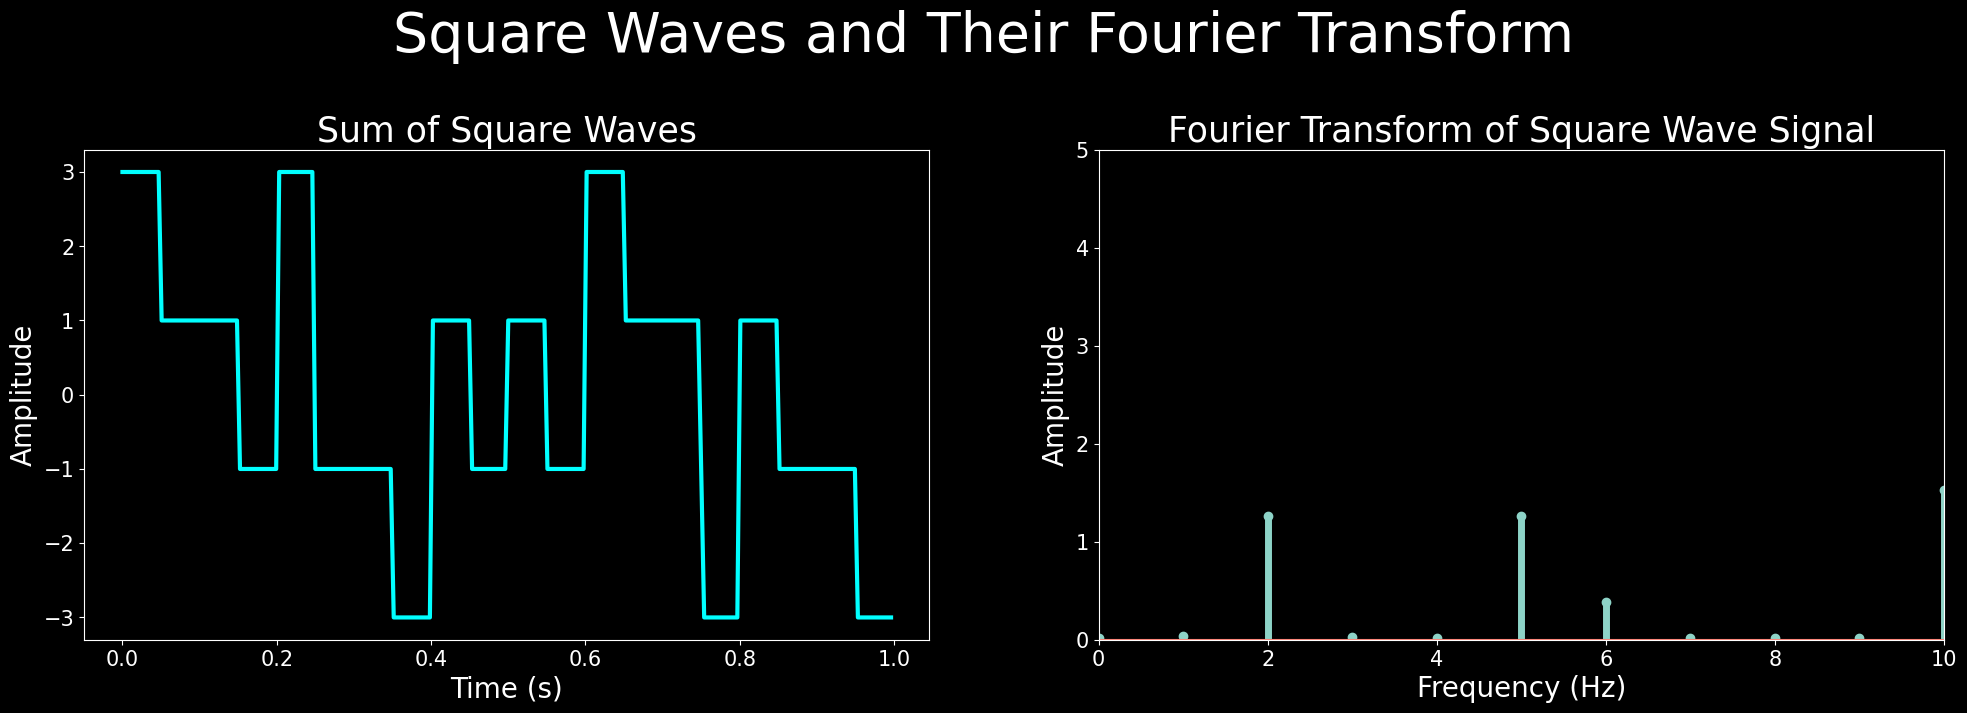

In [ ]:
#take a non sinusoidal signal and apply fourier transformation

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math
from scipy.signal import square

srate = 256  # Hz
Nyquist = srate / 2
t = np.arange(0., 1., 1/srate)  # Time vector in seconds

x1 = square(2 * np.pi * 2 * t)
x2 = square(2 * np.pi * 5 * t)
x3 = square(2 * np.pi * 10 * t)

x = x1 + x2 + x3

# Initializing Fourier Coefficients
X = np.zeros(len(x), dtype=complex)  # c(k)

for f in range(0, len(t)):
    csw = np.exp(-1j * 2 * np.pi * f * t)  # Complex exponential
    X[f] = np.sum(np.multiply(x, csw))  # Compute Fourier Transform

# Extract amplitudes
amps = 2 * np.abs(X) / len(t)

# converitng indices to frequency
Hz = np.linspace(0, Nyquist, math.floor(len(t) / 2) + 1)

# Plotting
plt.figure(figsize=(24, 14))
plt.suptitle('Square Waves and Their Fourier Transform', fontsize=40)
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(2, 2, 1)
plt.plot(t, x, linewidth=3, color='cyan')
plt.title("Sum of Square Waves", fontsize=25)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)

plt.subplot(2, 2, 2)
markerline, stemlines, baseline = plt.stem(Hz, amps[:len(Hz)])
plt.setp(stemlines, 'linewidth', 5)
plt.xlim(0, 20)
plt.ylim(0, 5)
plt.title("Fourier Transform of Square Wave Signal", fontsize=25)
plt.xlabel('Frequency (Hz)', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)

plt.show()
